In [1]:
import pandas as pd
import os
from pathlib import Path
import numpy as np
import seaborn as sns
from datetime import date
from datetime import datetime
import matplotlib.pyplot as plt
from adjustText import adjust_text
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter, FixedLocator, MultipleLocator
import locale
plt.style.use('Solarize_Light2')
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8');

# Dataset
Los datos se toman de la página de datos abiertos de Colombia. datos.gov.co. El instituto encargado de recopilar la información es el instituto Nacional de Salud INS

In [2]:
url = 'https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD'
pdet = pd.read_csv('data/MunicipiosPDET.csv')
censo = pd.read_csv('data/censo_municipal2018.csv')
datos = pd.read_csv(url)

/Users/jairotorregrosa/anaconda3/envs/covid/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
datos.tail(3)

ID de caso    Fecha de notificación  Código DIVIPOLA  \
671845      671886  2020-09-04T00:00:00.000            11001   
671846      671887  2020-09-04T00:00:00.000            11001   
671847      671888  2020-09-04T00:00:00.000            11001   

       Ciudad de ubicación Departamento o Distrito  atención  Edad Sexo  \
671845         Bogotá D.C.              Bogotá D.C.     Casa    27    M   
671846         Bogotá D.C.              Bogotá D.C.     Casa    52    F   
671847         Bogotá D.C.              Bogotá D.C.     Casa    56    M   

              Tipo Estado  ...                      FIS Fecha de muerte  \
671845  En estudio   Leve  ...  2020-08-17T00:00:00.000             NaN   
671846  En estudio   Leve  ...  2020-08-22T00:00:00.000             NaN   
671847  En estudio   Leve  ...  2020-08-21T00:00:00.000             NaN   

              Fecha diagnostico Fecha recuperado        fecha reporte web  \
671845  2020-09-01T00:00:00.000              NaN  2020-09-07T00:00:00.000   
671846  2020-09-04T00:00:00.000              NaN  2020-09-07T00:00:00.000   
671847  2020-09-04T00:00:00.000              NaN  2020-09-07T00:00:00.000   

       Tipo recuperación Codigo departamento  Codigo pais  Pertenencia etnica  \
671845               NaN                  11          NaN                 NaN   
671846               NaN                  11          NaN                 NaN   
671847               NaN                  11          NaN                 NaN   

       Nombre grupo etnico  
671845                 NaN  
671846                 NaN  
671847                 NaN  

[3 rows x 21 columns]

In [4]:
datos['Fecha de muerte'] = pd.to_datetime(datos['Fecha de muerte'])
datos['fecha reporte web'] = pd.to_datetime(datos['fecha reporte web'])

In [5]:
pdet_1 = datos[datos['Código DIVIPOLA'].isin(pdet['CodigoMunicipio'])]
pdet_1 = pdet_1.merge(pdet, how='left', left_on = 'Código DIVIPOLA', right_on='CodigoMunicipio')
pdet_casos = pdet_1.groupby(['fecha reporte web','NombreSubregion'])['ID de caso'].count().unstack().fillna(0)
pdet_casos_acumulados = pdet_casos.cumsum()

pdet_muertes = pdet_1.groupby(['Fecha de muerte','NombreSubregion'])['ID de caso'].count().unstack().fillna(0)
pdet_muertes_acumuladas = pdet_muertes.cumsum()

pdet_casos.tail()

NombreSubregion    ALTO PATÍA Y NORTE DEL CAUCA  ARAUCA  \
fecha reporte web                                         
2020-09-03                                 25.0     0.0   
2020-09-04                                 18.0    32.0   
2020-09-05                                 66.0    15.0   
2020-09-06                                 45.0     1.0   
2020-09-07                                  7.0     1.0   

NombreSubregion    BAJO CAUCA Y NORDESTE ANTIOQUEÑO  CATATUMBO  CHOCÓ  \
fecha reporte web                                                       
2020-09-03                                    141.0        6.0    4.0   
2020-09-04                                     42.0        2.0    3.0   
2020-09-05                                     31.0        5.0    0.0   
2020-09-06                                    175.0        3.0    2.0   
2020-09-07                                      3.0        3.0    3.0   

NombreSubregion    CUENCA DEL CAGUÁN Y PIEDEMONTE CAQUETEÑO  \
fecha reporte web                                             
2020-09-03                                             16.0   
2020-09-04                                            206.0   
2020-09-05                                            109.0   
2020-09-06                                            164.0   
2020-09-07                                            113.0   

NombreSubregion    MACARENA GUAVIARE  MONTES DE MARÍA  PACÍFICO MEDIO  \
fecha reporte web                                                       
2020-09-03                      15.0             11.0             2.0   
2020-09-04                      18.0             22.0             6.0   
2020-09-05                     136.0             25.0             1.0   
2020-09-06                      17.0             23.0             9.0   
2020-09-07                       1.0             20.0             0.0   

NombreSubregion    PACÍFICO Y FRONTERA NARIÑENSE  PUTUMAYO  \
fecha reporte web                                            
2020-09-03                                   4.0       9.0   
2020-09-04                                   1.0      36.0   
2020-09-05                                  27.0      65.0   
2020-09-06                                   1.0      45.0   
2020-09-07                                   5.0      27.0   

NombreSubregion    SIERRA NEVADA-PERIJÁ-ZONA BANANERA  SUR DE BOLÍVAR  \
fecha reporte web                                                       
2020-09-03                                      287.0             3.0   
2020-09-04                                      325.0            13.0   
2020-09-05                                      492.0             4.0   
2020-09-06                                      271.0             2.0   
2020-09-07                                      122.0             1.0   

NombreSubregion    SUR DE CÓRDOBA  SUR DEL TOLIMA  URABÁ ANTIOQUEÑO  
fecha reporte web                                                    
2020-09-03                   18.0             0.0             113.0  
2020-09-04                   67.0             3.0              60.0  
2020-09-05                    3.0             0.0              23.0  
2020-09-06                    6.0             0.0              76.0  
2020-09-07                    5.0             0.0              14.0

In [16]:
def rollingCases(df, cases, cantidad):
    df_append = pd.DataFrame()
    df = df.rolling(7, min_periods=1).mean()
    df.reset_index(drop=True, inplace=True)
    df =  df.reindex( columns=df.tail(7).mean().sort_values(ascending=False).index)
    #df = df.sort_values(axis=1, by=df.index[-7:-1].mean(), ascending=False).reset_index(drop=True)
    for ciudad in range(cantidad):
        df_temp = pd.DataFrame()
        # Se toma el indice desde que los casos superan X cantidad
        first_value = df[ df.iloc[:,ciudad] >= cases ].iloc[:,ciudad].head(1)
        if not first_value.empty:
            idx = first_value.index[0]
            df_temp['datos'] = df.iloc[idx:,ciudad]
            df_temp['ciudad'] = df.columns[ciudad]
            df_temp.reset_index(inplace=True)
            df_append = pd.concat([df_append, df_temp])
    return df_append

In [17]:
sns.set()
def graficar(df,titulo,xlabel,ylabel,texto):
    text = []
    ciudades = df['ciudad'].unique()
    #plt.style.use('fivethirtyeight')
    #plt.style.use('ggplot')
    plt.style.use('Solarize_Light2')
    plt.figure(figsize=(16,9), dpi=500)
    plt.margins(0.005,0.05)
    for ciudad in ciudades:
        if not ciudad == 'Sin Dato':
            y = df[df['ciudad']==ciudad]['datos']
            fig = sns.lineplot(x = y.index, y = y, data = df, legend=False)  
            if ciudad == 'Bogotá D.C.':
                ciudad = 'Bogotá'
            elif ciudad == 'San Andrés de Tumaco':
                ciudad = 'Tumaco'
            elif ciudad == 'Cartagena de Indias':
                ciudad = 'Cartagena'
            if ciudad == 'SIERRA NEVADA-PERIJÁ-ZONA BANANERA':
                pos = (-250,3)
            else:
                pos = (5,1)
            size = 16
            fig.annotate(ciudad, 
                xy=(y.index[-1], y.iloc[-1]), 
                xytext=pos, 
                color= plt.gca().lines[-1].get_color() ,  
                textcoords="offset points",
                size=size, va="center",weight='bold')
        #adjust_text(text)   
    ax = plt.gca()
    ax.set_yscale('log')
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_locator(FixedLocator([1,3,5,10,30,50,100,300,500,1000,3000,5000,10000,30000,50000,100000,300000,500000,1000000]))
    ax.xaxis.set_major_locator(MultipleLocator(10))
    plt.xlabel(xlabel, fontsize=18, weight='bold')
    plt.ylabel(ylabel, fontsize=16, weight='bold')
    plt.title(titulo, fontsize=18, weight='bold')
    plt.gcf().text(0.55, 0.15, texto, fontsize=10)
    plt.savefig(f'{carpeta}{titulo}.png', facecolor='w', bbox_inches='tight')
    plt.show()

In [18]:
pdet_num_casos_acu = 30
pdet_num_muertes_acu = 3
pdet_num_casos_diarios = 10
pdet_num_muertes_diarias = 3
dep_pdet = 10

In [19]:
fecha = date.today()
fecha_cool = datetime.strftime(fecha,'%B %d')
fecha = str(fecha)
texto_col = f'Instituto Nacional de Salud - @JairoTorregrose - {fecha_cool}'
texto_bog = f'SALUDATA - @JairoTorregrose - {fecha_cool}'
carpeta = f'maps/{fecha}/'
Path(carpeta).mkdir(parents=True, exist_ok=True)

In [20]:
titulo_muertes_acumuladas_pdet = f'TOP {dep_pdet} sub-regiones PDET con Muertes Acumuladas'
xlabel_muertes_acumuladas_pdet = f'Número de días desde las primeras {pdet_num_muertes_acu} muertes'
ylabel_muertes_acumuladas_pdet = 'Muertes acumuladas'

titulo_casos_acumulados_pdet = f'TOP {dep_pdet} sub-regiones PDET con Casos Acumulados'
xlabel_casos_acumulados_pdet = f'Número de días desde los primeros {pdet_num_casos_acu} casos'
ylabel_casos_acumulados_pdet = 'Casos acumulados'

titulo_casos_diarios_pdet = f'TOP {dep_pdet} sub-regiones PDET con Casos Diarios'
xlabel_casos_diarios_pdet = f'Número de días desde los primeros {pdet_num_casos_diarios} casos diarios'
ylabel_casos_diarios_pdet = 'Casos diarios'

In [21]:
df_casos_acum_pdet = rollingCases(pdet_casos_acumulados, cases=pdet_num_casos_acu, cantidad=dep_pdet)
df_muertes_acum_pdet = rollingCases(pdet_muertes_acumuladas, cases=pdet_num_muertes_acu, cantidad=dep_pdet)

df_casos_diarios_pdet = rollingCases(pdet_casos, cases=pdet_num_casos_diarios, cantidad=dep_pdet)

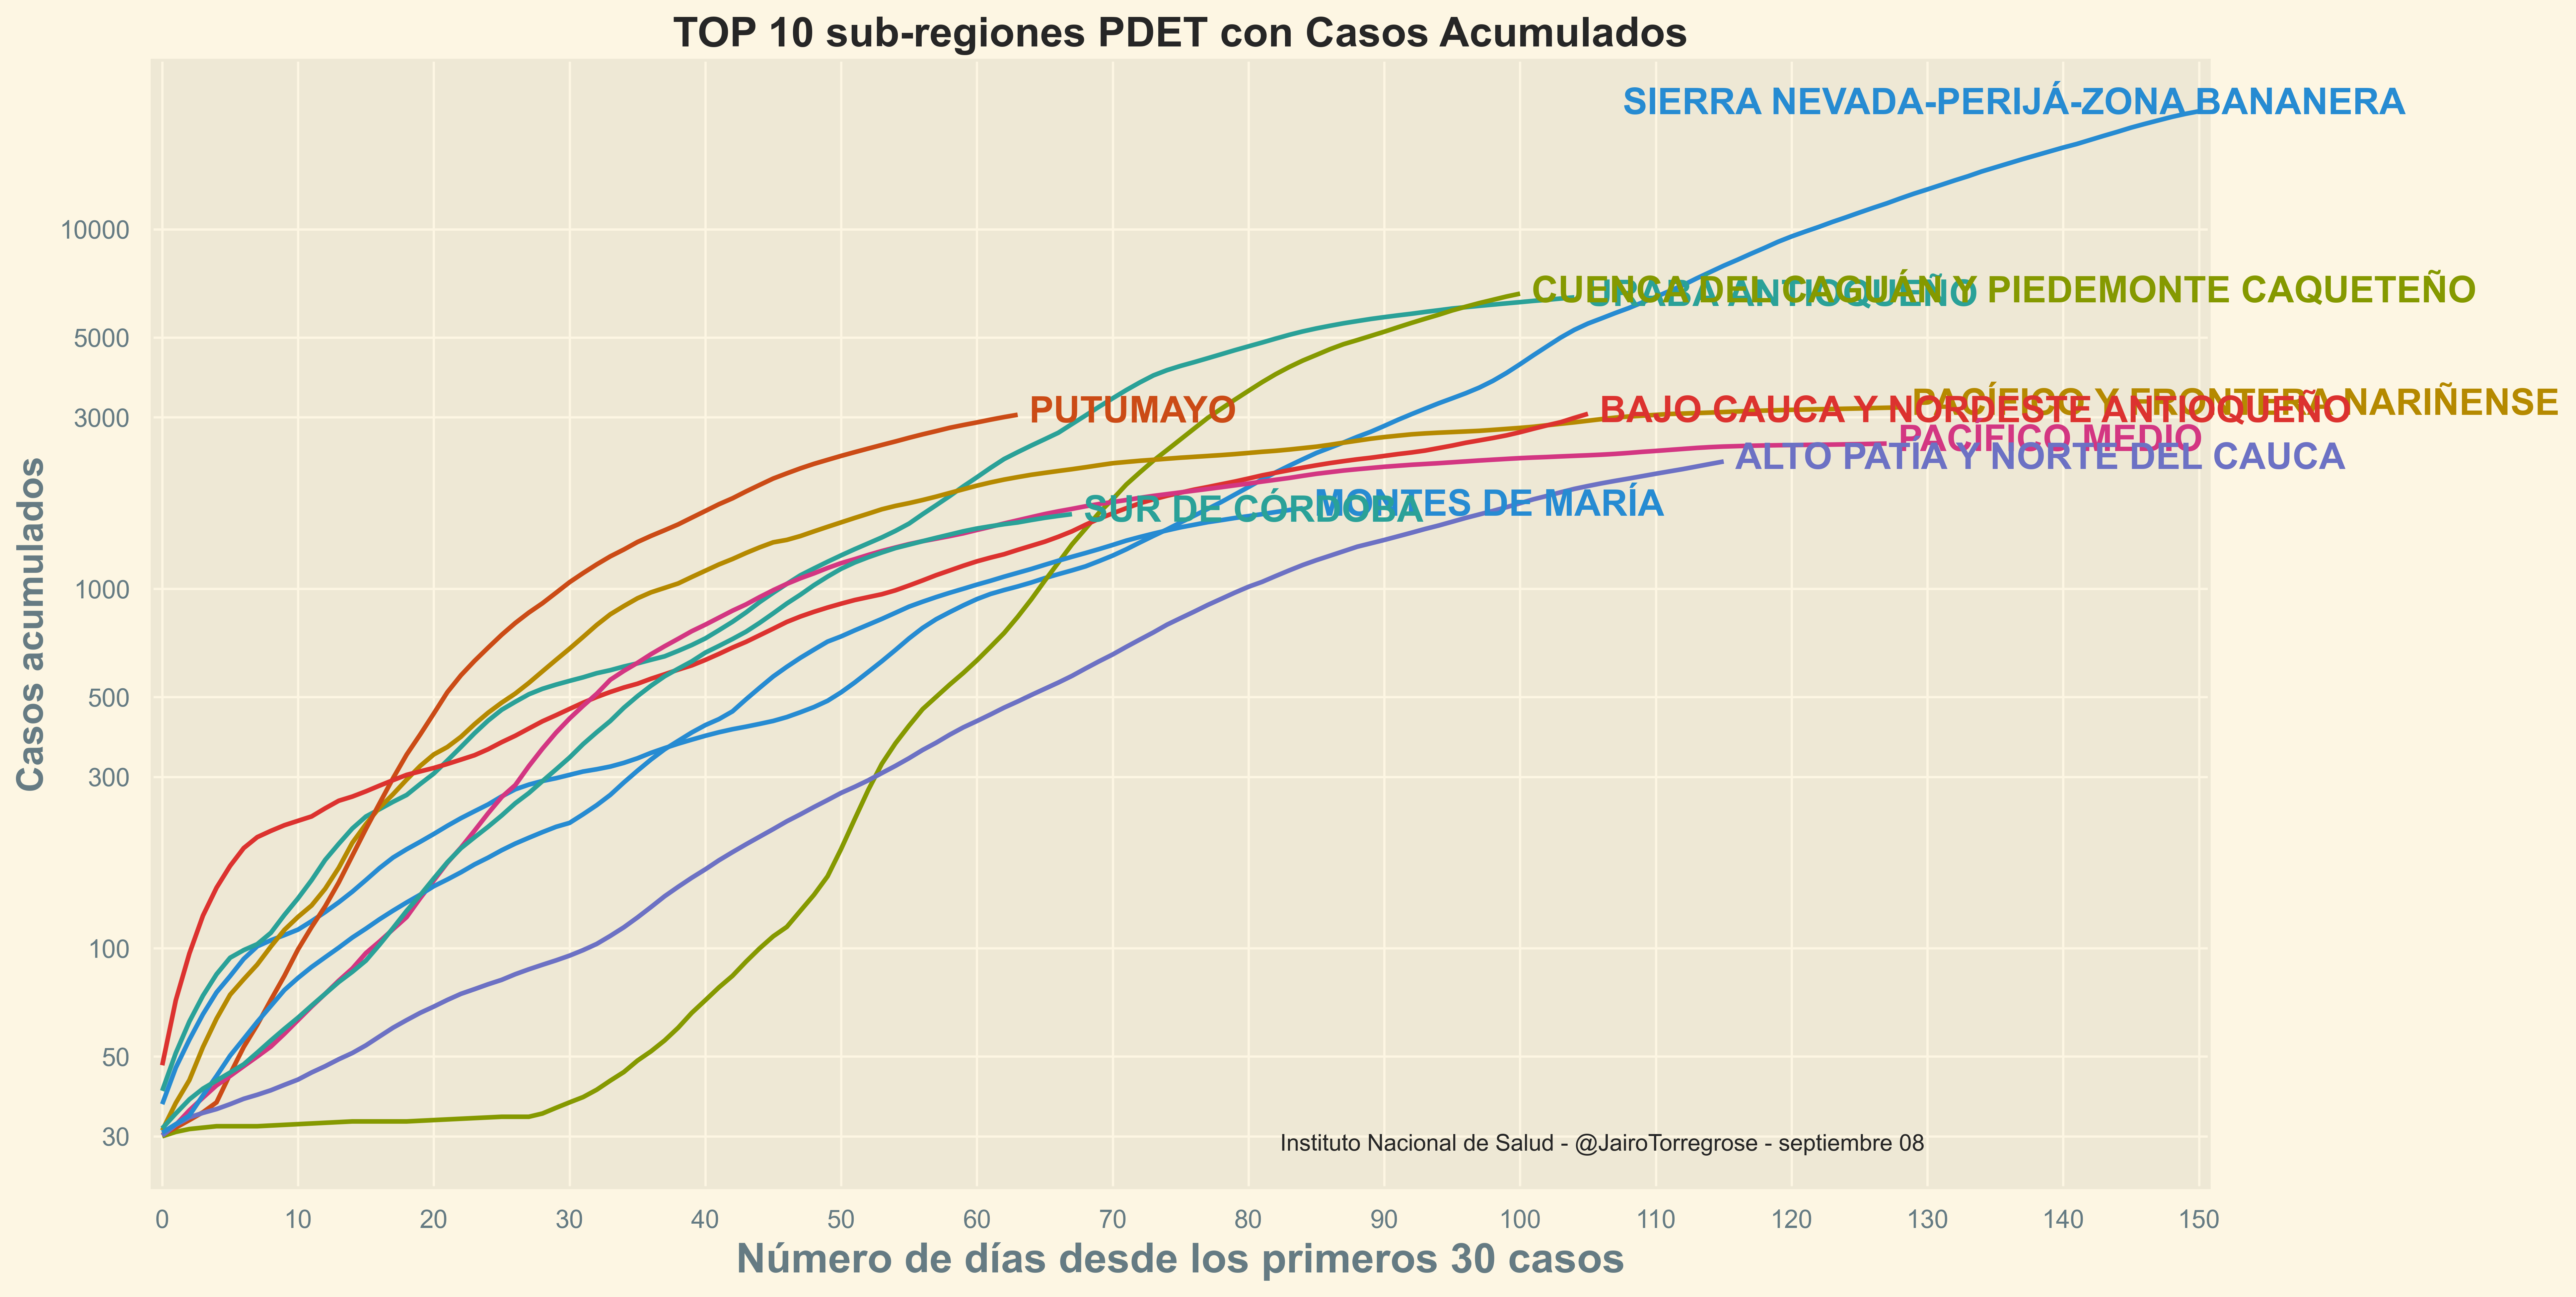

In [22]:
graficar(df_casos_acum_pdet, titulo_casos_acumulados_pdet,xlabel_casos_acumulados_pdet, ylabel_casos_acumulados_pdet,texto_col)

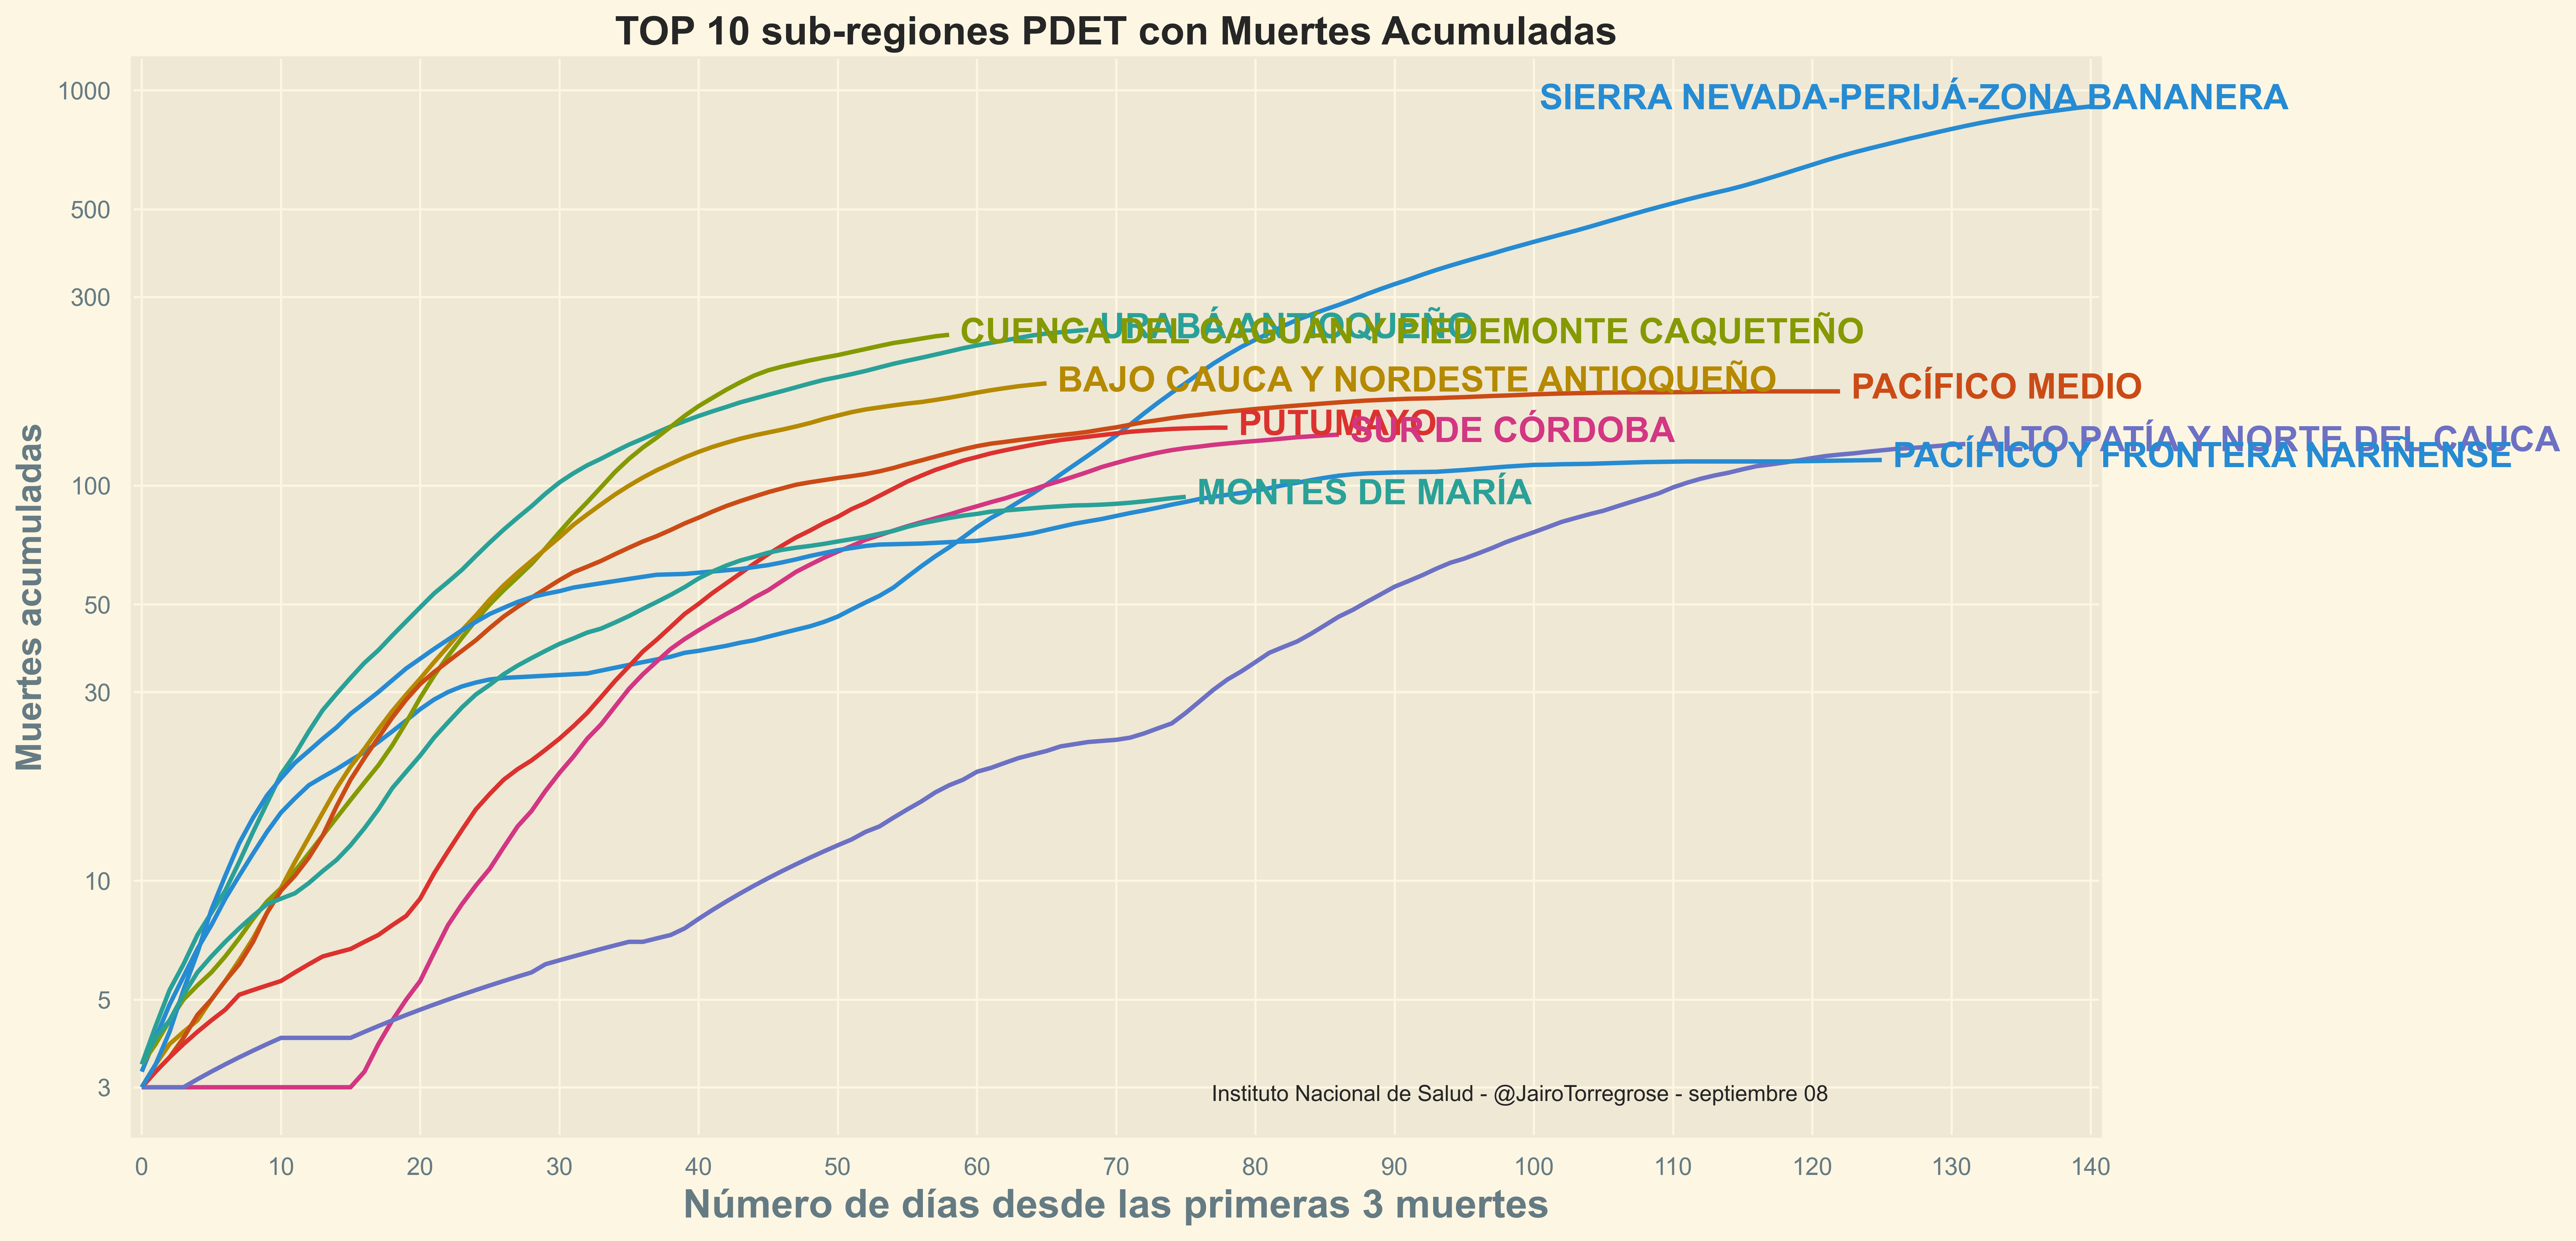

In [23]:
graficar(df_muertes_acum_pdet,titulo_muertes_acumuladas_pdet,xlabel_muertes_acumuladas_pdet,ylabel_muertes_acumuladas_pdet,texto_col)

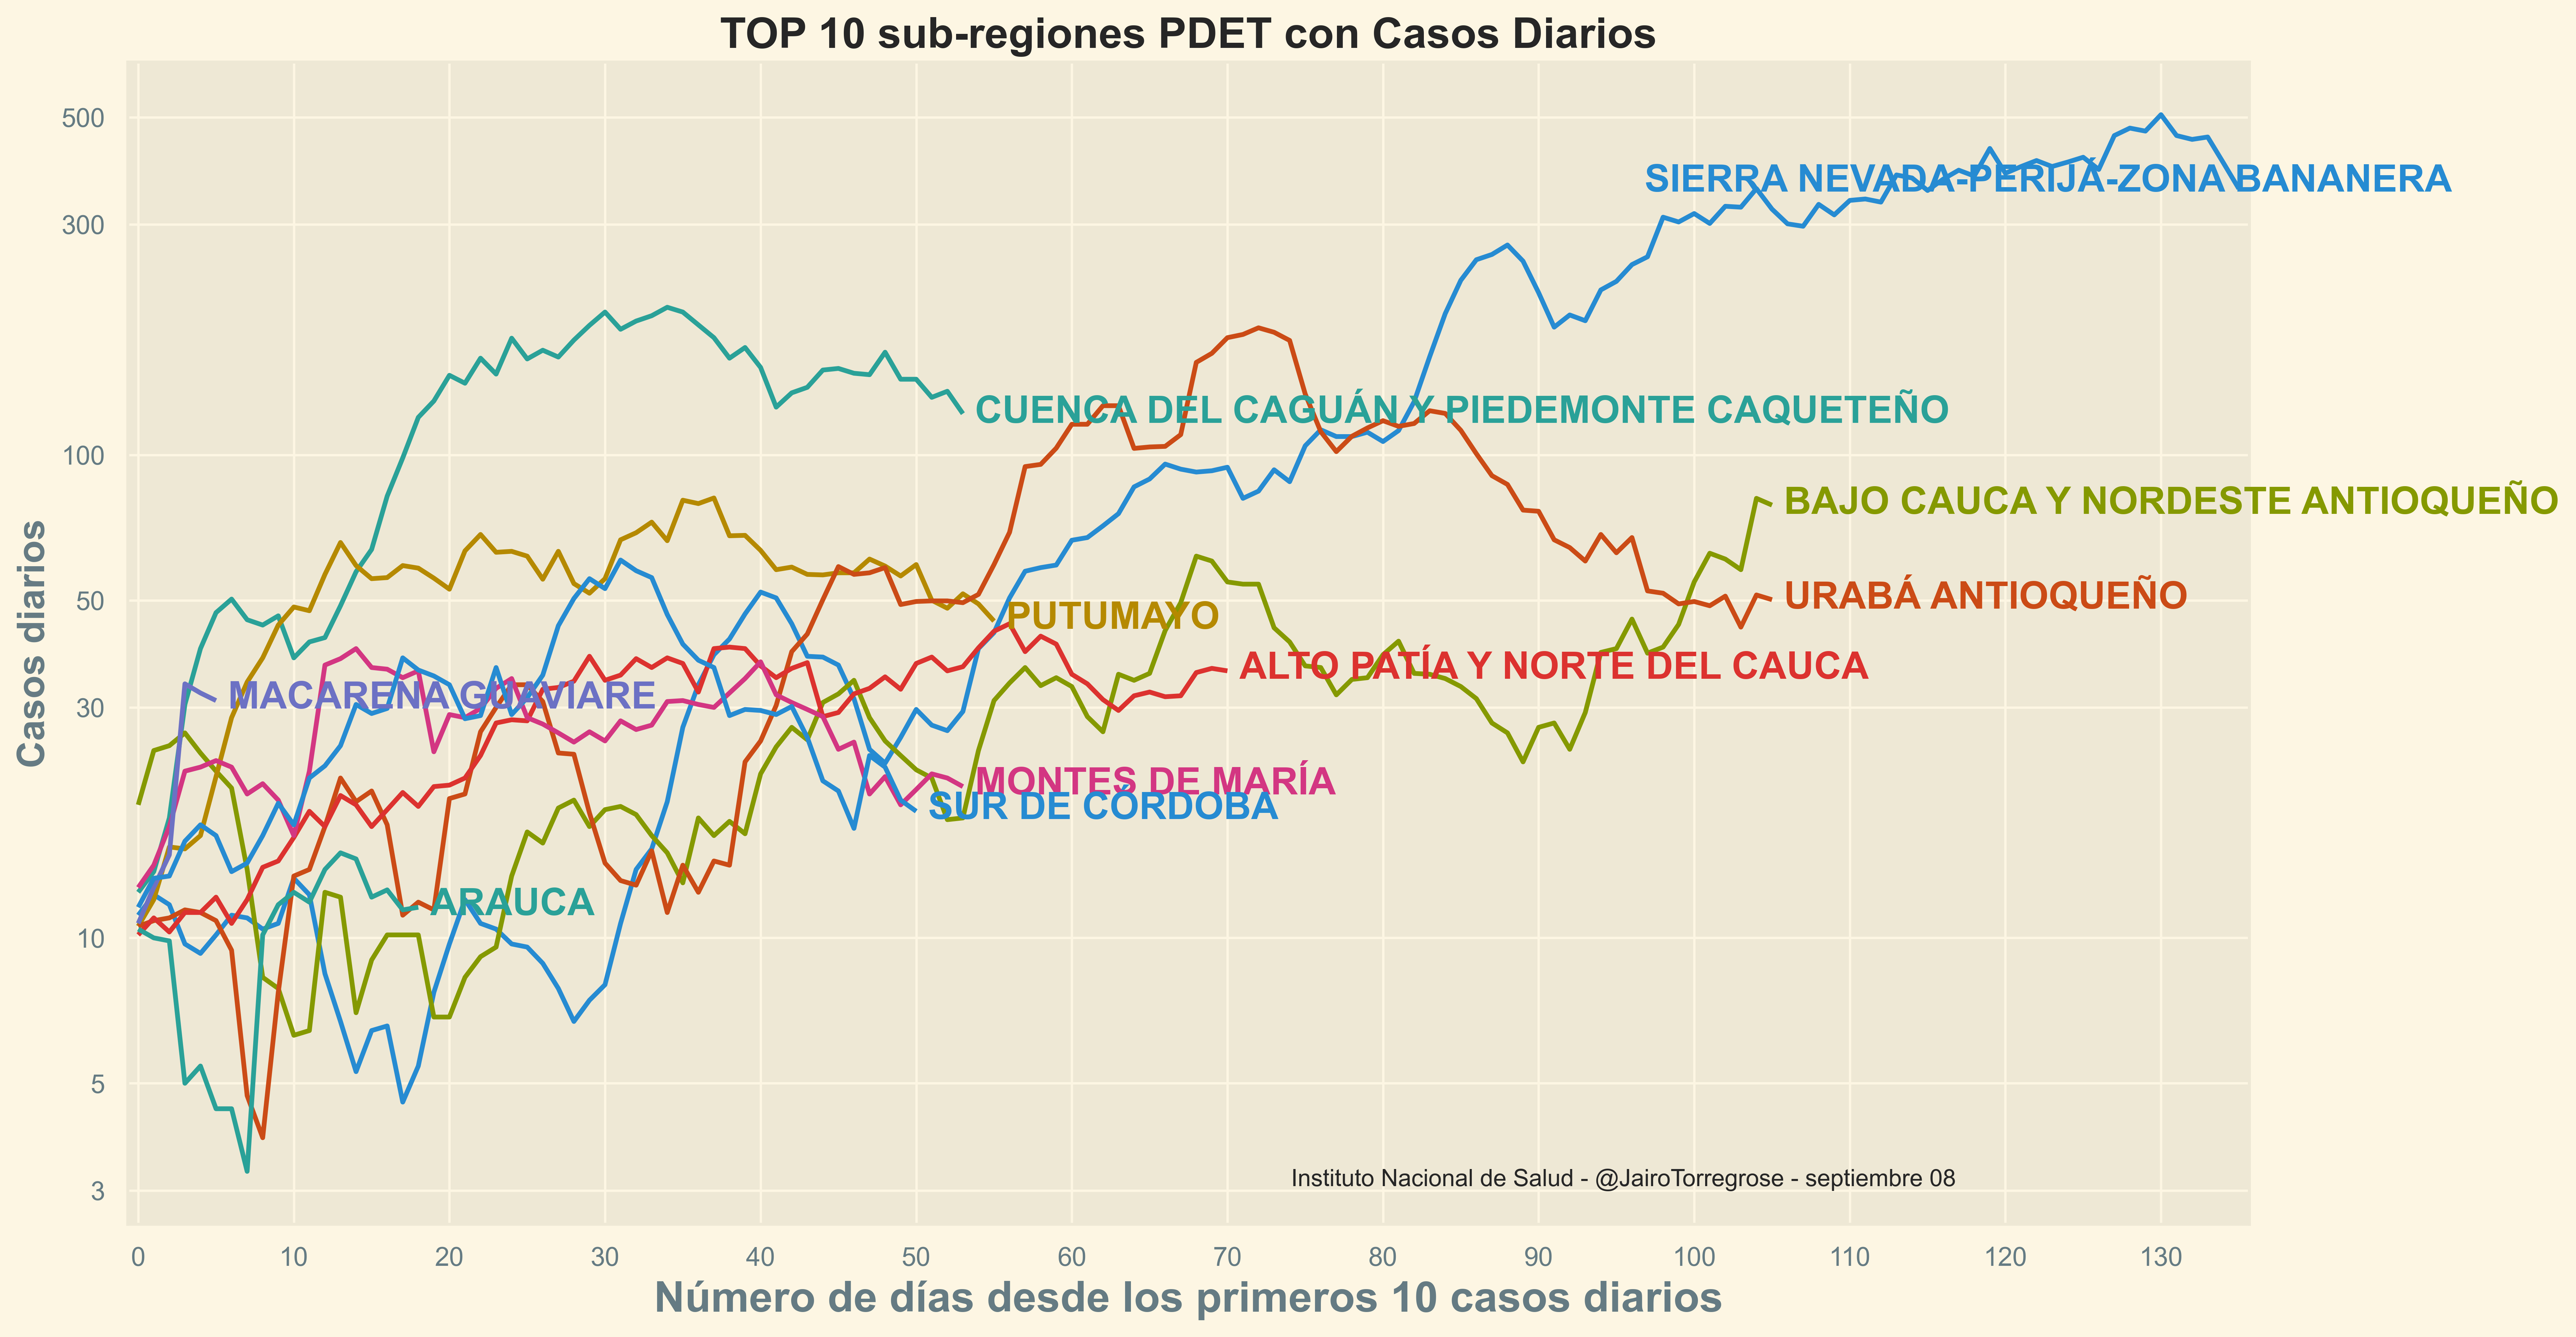

In [24]:
graficar(df_casos_diarios_pdet,titulo_casos_diarios_pdet,xlabel_casos_diarios_pdet,ylabel_casos_diarios_pdet,texto_col)